In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import matplotlib.pyplot as plt

Question 1 - Extracting Tesla Stock Data Using yfinance

In [7]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period = 'max')
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [45]:
url = "https://companiesmarketcap.com/tesla/revenue/"
html  = requests.get(url).text
soup = BeautifulSoup(html,"html5lib")
tables = soup.find_all('table')
for index,table in enumerate(tables):
    if ("Year" in str(table)):
        table_index = index
tesla_re_data = pd.DataFrame(columns=['Year', 'Revenue'])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace("B", "").strip()
        tesla_re_data = tesla_re_data.append({"Year": Date, "Revenue": Revenue}, ignore_index=True)
tesla_re_data.tail()

,Year,Revenue
10,2013,2.01
11,2012,0.41
12,2011,0.20
13,2010,0.11
14,2009,0.11


Question 3 - Extracting GameStop Stock Data Using yfinance

In [46]:
gamstop = yf.Ticker("GME")
gamstop_data = gamstop.history(period = 'max')
gamstop_data.reset_index(inplace = True)
gamstop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [47]:
url = "https://companiesmarketcap.com/gamestop/revenue/"
html = requests.get(url).text
soup = BeautifulSoup(html, "html5lib")
tables = soup.find_all('table')
for index, table in enumerate(tables):
    if "percentage-green" in str(table):
        table_index = index
        break
gamestop_re_data = pd.DataFrame(columns=['Year', 'Revenue'])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if col:
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace("B", "").strip()
        gamestop_re_data = gamestop_re_data.append({"Year": Date, "Revenue": Revenue}, ignore_index=True)
gamestop_re_data.tail()


,Year,Revenue
17,2006,4.68
18,2005,2.13
19,2004,1.75
20,2003,1.47
21,2002,1.34


Question 5 - Tesla Stock and Revenue Dashboard

In [50]:
def make_graph(stock_data, revenue_data, company_name):
    plt.figure(figsize=(10, 6))

    # Plot stock data
    stock_data.plot(x='Date', y='Close', label='Stock Price', color='blue')
    plt.ylabel('Stock Price')
    plt.legend(loc='upper left')

    # Convert 'Revenue' column to numeric
    revenue_data['Revenue'] = pd.to_numeric(revenue_data['Revenue'], errors='coerce')

    # Plot revenue data
    revenue_data.plot(x='Year', y='Revenue', label='Revenue', color='green', marker='o')
    plt.xlabel('Date/Year')
    plt.ylabel('Revenue')
    plt.legend(loc='upper left')

    # Show the dashboard
    plt.title(f'{company_name} Stock and Revenue Dashboard')
    plt.show()

<Figure size 1000x600 with 0 Axes>

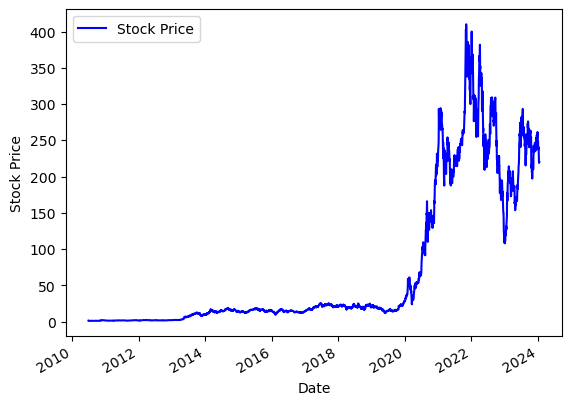

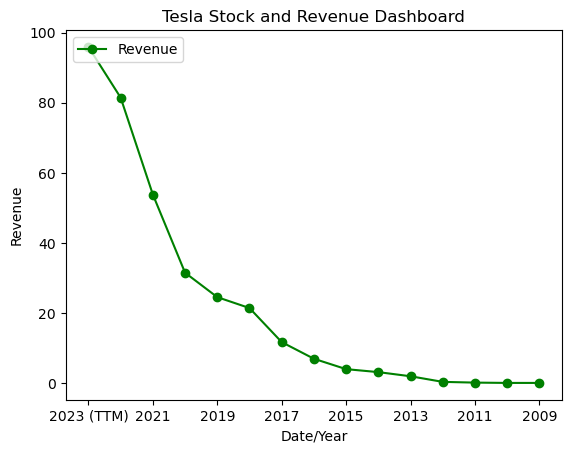

In [51]:
make_graph(tesla_data, tesla_re_data, 'Tesla')

Question 6 - GameStop Stock and Revenue Dashboard

<Figure size 1000x600 with 0 Axes>

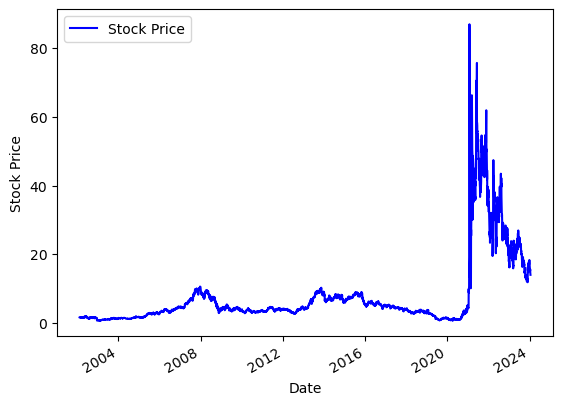

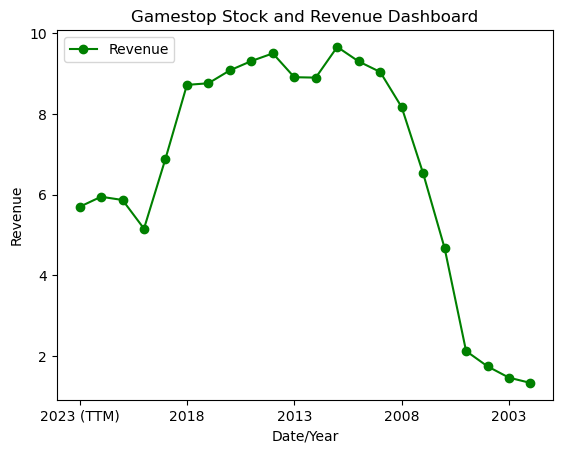

In [52]:
make_graph(gamstop_data, gamestop_re_data, 'Gamestop')